In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno # pip3 install missingno
import seaborn as sns 
sns.set_style("whitegrid")
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## 1. Load Data

In [3]:
df=pd.read_csv("sothebys.csv", index_col=0)

In [4]:
print(df.shape)
display(df.head())

(22711, 25)


,lot_id,auction_id,lot_title,estimate_low,estimate_high,hammer_price_bp,currency,nth_in_auction,lot_number,condition,provenance,literature,external_image_url,auction_house_id,auc_title,number_of_lots,location,start_date,end_date,auc_desc,sale_id,artist_id,name,birth_year,death_year
0,364930,3,BACCHUS,35000.0,45000.0,NaN,USD,20,20,NaN,This tempera will be included in the&nbsp;<em>...,NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098000+00:00,2018-03-28 14:00:00.098000+00:00,Sotheby’s 28 March 2018 American Art sale pres...,N09844,247,Rockwell Kent,1882,1971
1,364927,3,FOOTSTEPS IN THE SNOW,15000.0,20000.0,NaN,USD,17,17,"Oil on canvas, canvas is not lined. Surface: ...","Sold: Bonhams, New York, November 28, 2006, lo...",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098000+00:00,2018-03-28 14:00:00.098000+00:00,Sotheby’s 28 March 2018 American Art sale pres...,N09844,245,Dale William Nichols,1904,1995
2,364919,3,GROWTH VARIANT NO. IV,25000.0,35000.0,NaN,USD,10,10,NaN,"Linda Durham Gallery, Santa Fe, New Mexico<br>...",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098000+00:00,2018-03-28 14:00:00.098000+00:00,Sotheby’s 28 March 2018 American Art sale pres...,N09844,121,Raymond Jonson,1891,1982
3,364917,3,STILL-LIFE,15000.0,20000.0,NaN,USD,8,8,NaN,"Private collection, New York",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098000+00:00,2018-03-28 14:00:00.098000+00:00,Sotheby’s 28 March 2018 American Art sale pres...,N09844,96,Byron Browne,1907,1961
4,364911,3,HELIOS INTERVAL,3000.0,5000.0,NaN,USD,3,3,NaN,"Private collection, New York",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098000+00:00,2018-03-28 14:00:00.098000+00:00,Sotheby’s 28 March 2018 American Art sale pres...,N09844,28,George Soppelsa,1939,NaN


In [5]:
#convert datatime columns
df.start_date =pd.to_datetime(df.start_date)
df.end_date =pd.to_datetime(df.end_date)

In [6]:
# Check Auction length
cnt=np.where(df["end_date"]!=df["start_date"],1,0).sum()
#cnt=0
df.drop("end_date",axis=1,inplace=True)

Therefore, we'll use $start\_date$ as the time that the auction occured going forward. 

In [7]:
#clean up birth_year
df.birth_year=pd.to_numeric(df.birth_year,errors='coerce').fillna(0).astype(np.int64)

## 2. Add Features

In [8]:
# Add year, month and season for auction time
df["auc_date"] = pd.DatetimeIndex(df.start_date).normalize()
df['auc_year'] = pd.DatetimeIndex(df['start_date']).year
df['auc_month'] = pd.DatetimeIndex(df['start_date']).month
df['auc_season'] = df["start_date"].apply(lambda dt: (dt.month%12 + 3)//3)

df.head()

,lot_id,auction_id,lot_title,estimate_low,estimate_high,hammer_price_bp,currency,nth_in_auction,lot_number,condition,provenance,literature,external_image_url,auction_house_id,auc_title,number_of_lots,location,start_date,auc_desc,sale_id,artist_id,name,birth_year,death_year,auc_date,auc_year,auc_month,auc_season
0,364930,3,BACCHUS,35000.0,45000.0,NaN,USD,20,20,NaN,This tempera will be included in the&nbsp;<em>...,NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,247,Rockwell Kent,1882,1971,2018-03-28,2018,3,2
1,364927,3,FOOTSTEPS IN THE SNOW,15000.0,20000.0,NaN,USD,17,17,"Oil on canvas, canvas is not lined. Surface: ...","Sold: Bonhams, New York, November 28, 2006, lo...",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,245,Dale William Nichols,1904,1995,2018-03-28,2018,3,2
2,364919,3,GROWTH VARIANT NO. IV,25000.0,35000.0,NaN,USD,10,10,NaN,"Linda Durham Gallery, Santa Fe, New Mexico<br>...",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,121,Raymond Jonson,1891,1982,2018-03-28,2018,3,2
3,364917,3,STILL-LIFE,15000.0,20000.0,NaN,USD,8,8,NaN,"Private collection, New York",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,96,Byron Browne,1907,1961,2018-03-28,2018,3,2
4,364911,3,HELIOS INTERVAL,3000.0,5000.0,NaN,USD,3,3,NaN,"Private collection, New York",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,28,George Soppelsa,1939,NaN,2018-03-28,2018,3,2


In [9]:
# Add a boolean column to indicate if the lot is named "untitled"
words='|'.join(["INTITULADO","UNTITLED","OHNE TITEL","SANS TITRE","SENZA TITOLO"])
df["is_untitled"]=np.where(df["lot_title"].str.contains(words), 1, 0)
df.is_untitled.value_counts()

0    16574
1     6137
Name: is_untitled, dtype: int64

In [10]:
# Normalize "nth_in_auction" column by "auction_id" into 10 tiles
df["auc_order"]= df.groupby("auction_id")["nth_in_auction"].transform(
                     lambda x: pd.qcut(x, 10, labels=range(1,11))) 

df.head()

,lot_id,auction_id,lot_title,estimate_low,estimate_high,hammer_price_bp,currency,nth_in_auction,lot_number,condition,provenance,literature,external_image_url,auction_house_id,auc_title,number_of_lots,location,start_date,auc_desc,sale_id,artist_id,name,birth_year,death_year,auc_date,auc_year,auc_month,auc_season,is_untitled,auc_order
0,364930,3,BACCHUS,35000.0,45000.0,NaN,USD,20,20,NaN,This tempera will be included in the&nbsp;<em>...,NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,247,Rockwell Kent,1882,1971,2018-03-28,2018,3,2,0,2
1,364927,3,FOOTSTEPS IN THE SNOW,15000.0,20000.0,NaN,USD,17,17,"Oil on canvas, canvas is not lined. Surface: ...","Sold: Bonhams, New York, November 28, 2006, lo...",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,245,Dale William Nichols,1904,1995,2018-03-28,2018,3,2,0,1
2,364919,3,GROWTH VARIANT NO. IV,25000.0,35000.0,NaN,USD,10,10,NaN,"Linda Durham Gallery, Santa Fe, New Mexico<br>...",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,121,Raymond Jonson,1891,1982,2018-03-28,2018,3,2,0,1
3,364917,3,STILL-LIFE,15000.0,20000.0,NaN,USD,8,8,NaN,"Private collection, New York",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,96,Byron Browne,1907,1961,2018-03-28,2018,3,2,0,1
4,364911,3,HELIOS INTERVAL,3000.0,5000.0,NaN,USD,3,3,NaN,"Private collection, New York",NaN,http://www.sothebys.com/content/dam/stb/lots/N...,1,American Art,173,NEW YORK,2018-03-28 14:00:00.098,Sotheby’s 28 March 2018 American Art sale pres...,N09844,28,George Soppelsa,1939,NaN,2018-03-28,2018,3,2,0,1


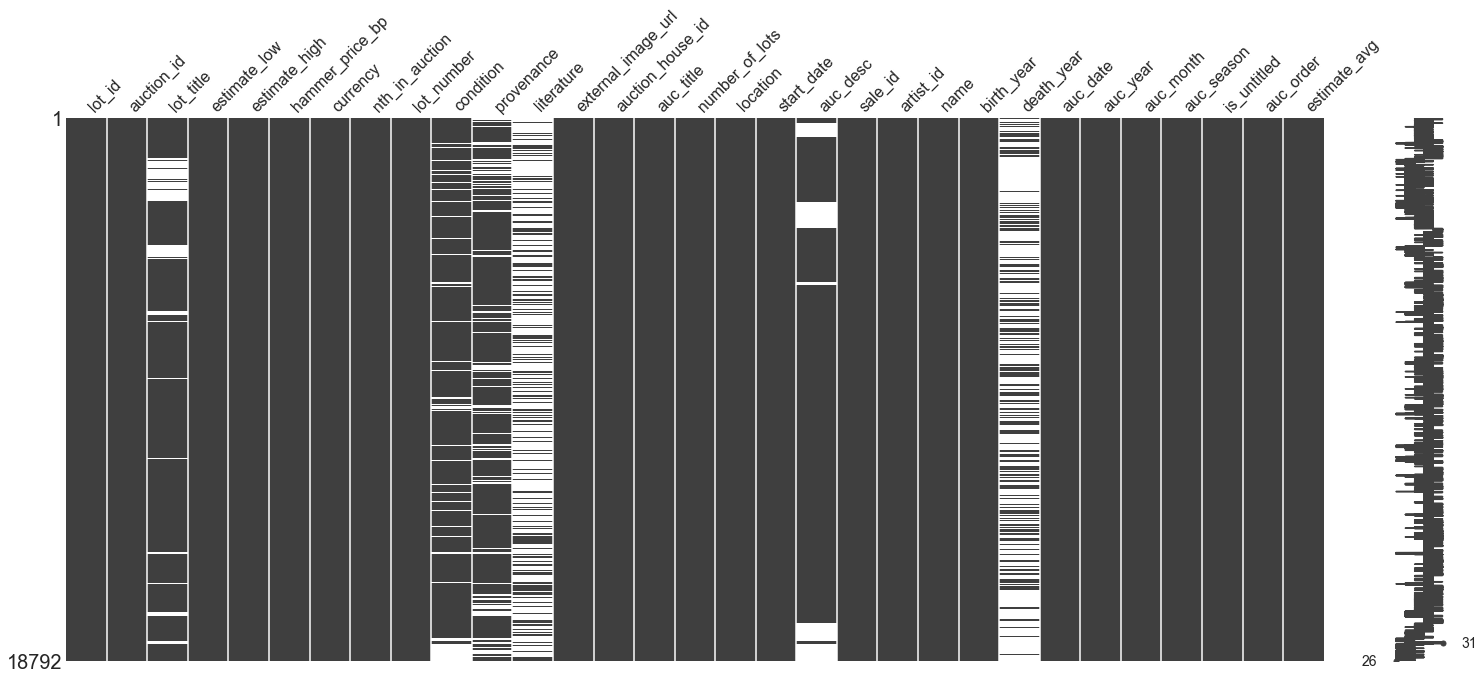

In [11]:
# Add avg_estimate
df = df.dropna(subset=['estimate_low', 'estimate_high', 'hammer_price_bp'])

df["estimate_avg"]=(df["estimate_low"] + df["estimate_high"])/2

msno.matrix(df)

## 3. Convert Currency

In [13]:
# pip install --user currencyconverter
from currency_converter import CurrencyConverter
from datetime import datetime
c = CurrencyConverter(fallback_on_wrong_date=True, fallback_on_missing_rate=True)

hammer_price = df[['hammer_price_bp', 'currency', 'start_date']].copy()
est_low = df[['estimate_low', 'currency', 'start_date']].copy()
est_high = df[['estimate_high', 'currency', 'start_date']].copy()
est_avg = df[['estimate_avg', 'currency', 'start_date']].copy()

hammer_price.start_date = hammer_price.start_date.apply(lambda x: x.strftime('%Y-%m-%d') if not pd.isnull(x) else x)
est_low.start_date = est_low.start_date.apply(lambda x: x.strftime('%Y-%m-%d') if not pd.isnull(x) else x)
est_high.start_date = est_high.start_date.apply(lambda x: x.strftime('%Y-%m-%d') if not pd.isnull(x) else x)
est_avg.start_date = est_avg.start_date.apply(lambda x: x.strftime('%Y-%m-%d') if not pd.isnull(x) else x)

df['hammer_price_bp_usd'] = np.apply_along_axis(lambda x: np.round(c.convert(x[0], x[1], 'USD', date=pd.to_datetime(x[2])), 2), 1, hammer_price)
df['estimate_low_usd'] = np.apply_along_axis(lambda x: np.round(c.convert(x[0], x[1], 'USD', date=pd.to_datetime(x[2])), 2), 1, est_low)    
df['estimate_high_usd'] = np.apply_along_axis(lambda x: np.round(c.convert(x[0], x[1], 'USD', date=pd.to_datetime(x[2])), 2), 1, est_high)
df['estimate_avg_usd'] = np.apply_along_axis(lambda x: np.round(c.convert(x[0], x[1], 'USD', date=pd.to_datetime(x[2])), 2), 1, est_avg)
 

display(df.shape)
display(df.head())

display(df.sale_id.value_counts())


(18792, 35)

,lot_id,auction_id,lot_title,estimate_low,estimate_high,hammer_price_bp,currency,nth_in_auction,lot_number,condition,provenance,literature,external_image_url,auction_house_id,auc_title,number_of_lots,location,start_date,auc_desc,sale_id,artist_id,name,birth_year,death_year,auc_date,auc_year,auc_month,auc_season,is_untitled,auc_order,estimate_avg,hammer_price_bp_usd,estimate_low_usd,estimate_high_usd,estimate_avg_usd
174,22713,216,YELLOW IRIS DIPTYCH,10000.0,15000.0,8750.0,USD,283,336,Left canvas: In good condition. Slight ripple...,Acquired directly from the artist by the prese...,NaN,http://www.sothebys.com/content/dam/default/un...,1,Contemporary Art,285,NEW YORK,2010-03-09 15:00:00,OVERVIEW\n\nSotheby's March 9th Contemporary A...,N08617,1449,Lowell Nesbitt,1933,1993,2010-03-09,2010,3,2,0,10,12500.0,8750.0,10000.0,15000.0,12500.0
175,22712,216,UNTITLED (NUDE WITH HAT AND TWO PARROTS): A PAIR,5000.0,7000.0,9375.0,USD,282,335,i) In good condition. Sheet slightly irregula...,NaN,NaN,http://www.sothebys.com/content/dam/default/un...,1,Contemporary Art,285,NEW YORK,2010-03-09 15:00:00,OVERVIEW\n\nSotheby's March 9th Contemporary A...,N08617,885,Walasse Ting,1929,NaN,2010-03-09,2010,3,2,1,10,6000.0,9375.0,5000.0,7000.0,6000.0
176,22711,216,UNTITLED,12000.0,18000.0,18750.0,USD,281,334,In good condition. In large 19th century fram...,NaN,NaN,http://www.sothebys.com/content/dam/default/un...,1,Contemporary Art,285,NEW YORK,2010-03-09 15:00:00,OVERVIEW\n\nSotheby's March 9th Contemporary A...,N08617,8546,Shen Hanwu,1950,NaN,2010-03-09,2010,3,2,1,10,15000.0,18750.0,12000.0,18000.0,15000.0
177,22710,216,UNTITLED,10000.0,12000.0,17500.0,USD,280,332,Work is stamped with estate stamp and numbered...,NaN,NaN,http://www.sothebys.com/content/dam/default/un...,1,Contemporary Art,285,NEW YORK,2010-03-09 15:00:00,OVERVIEW\n\nSotheby's March 9th Contemporary A...,N08617,8545,Leonard Nelson,1912,1993,2010-03-09,2010,3,2,1,10,11000.0,17500.0,10000.0,12000.0,11000.0
178,22704,216,PHENOMENA RIM OF AUGUST,12000.0,16000.0,31250.0,USD,279,331,In good condition aside from slight surface du...,"Gimpel and Weitzenhoffer, Ltd., New York",NaN,http://www.sothebys.com/content/dam/default/un...,1,Contemporary Art,285,NEW YORK,2010-03-09 15:00:00,OVERVIEW\n\nSotheby's March 9th Contemporary A...,N08617,5793,Paul Jenkins,1923,NaN,2010-03-09,2010,3,2,0,10,14000.0,31250.0,12000.0,16000.0,14000.0


M1100     1477
L14313     615
N08822     466
N08745     308
N08593     282
N08637     264
N09473     256
N08792     253
N09165     252
N08298     231
N08568     224
N08172     220
N08343     219
N08617     217
N09573     212
L14025     209
N09346     208
N09624     200
N09622     200
L17305     199
N08901     195
N09501     189
N09762     188
N09714     181
F9093      179
N08720     177
L10160     175
N08854     174
L18021     173
L09623     169
F1650      167
L16021     163
M1097      160
N09553     157
L10021     156
L16148     151
N08679     151
M1095      151
N08829     143
N09142     138
L12027     137
F1750      135
I0315      134
I0302      133
N08662     131
L16026     127
N09494     124
N09222     121
F1515      120
K0230      119
I0318      117
K0250      115
F1105      114
L16023     112
F1505      111
N08875     110
L16227     110
I0308      106
N09247     106
N09038     103
F1744      103
I0312       99
I0327       95
F1013       93
L11025      93
N09196      92
L12021    

## 4. Export to CSV

In [ ]:
df.to_csv("final_sothebys.csv")